<a href="https://colab.research.google.com/github/DilemmaFixer3/kursova/blob/main/CNN_%D0%B4%D0%BB%D1%8F_%D0%B4%D1%96%D0%B0%D0%B3%D0%BD%D0%BE%D1%81%D1%82%D0%B8%D0%BA%D0%B8_%D0%BF%D0%BD%D0%B5%D0%B2%D0%BC%D0%BE%D0%BD%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

# 1. Параметри входу
IMAGE_SIZE = (224, 224)
INPUT_SHAPE = IMAGE_SIZE + (3,) # (224, 224, 3)

# 2. Побудова моделі (така ж логіка, як у train_cnn_pneumonia.py)
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=INPUT_SHAPE
)

# Заморожуємо ваги (хоча для summary це не критично, зберігаємо логіку)
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# 3. Виведення архітектури (використовуйте скріншот цього виводу для Звіту)
print("--- Архітектура моделі для Розділу 2.1 (Скріншот) ---")
model.summary()

# 4. Виведення кількості тренованих/нетренованих параметрів
print(f"\nЗагальна кількість параметрів: {model.count_params()}")
print(f"Кількість тренованих параметрів (нові шари): {len(model.trainable_weights)}")
print(f"Кількість нетренованих параметрів (MobileNetV2): {len(model.non_trainable_weights)}")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Архітектура моделі для Розділу 2.1 (Скріншот) ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Загальна кількість параметрів: 2422081
Кількість тренованих параметрів (нові шари): 4
Кількість нетренованих параметрів (MobileNetV2): 260


In [ ]:
# -*- coding: utf-8 -*-
#
# Скрипт для реалізації та навчання Згорткової Нейронної Мережі (CNN)
# для бінарної класифікації пневмонії на рентгенівських знімках грудної клітки.
#
# Використовується метод Transfer Learning на базі MobileNetV2.
#
# Крок 1: Встановлення необхідних бібліотек
# pip install tensorflow numpy scikit-learn matplotlib
#

import os
import shutil # Додано для обробки файлів та папок
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Гіперпараметри моделі та навчання
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10  # Для тестування використовуємо менше епох. Для фінальної роботи рекомендується 20-30.
LEARNING_RATE = 0.0001
CLASSES = ['NORMAL', 'PNEUMONIA']
NUM_CLASSES = len(CLASSES)
BASE_DIR = 'chest_xray_data' # Основна папка, де мають знаходитися дані

# --- 1.4 Етап 1: Підготовка даних та Аугментація ---

# Видаляємо функцію-заглушку create_dummy_data_structure,
# оскільки тепер ми працюємо з реальним архівом.

def setup_data_generators(base_dir=BASE_DIR):
    """
    Налаштування генераторів даних для завантаження, аугментації та нормалізації.
    """
    print("\nНалаштування генераторів даних...")

    # 1.4.1 Нормалізація: Ділимо на 255.0
    # 1.4.3 Аугментація для тренувального набору
    train_datagen = ImageDataGenerator(
        rescale=1./255, # Нормалізація
        rotation_range=10, # Незначні повороти
        zoom_range=0.1, # Зміна масштабу
        width_shift_range=0.1, # Зсуви по ширині
        height_shift_range=0.1, # Зсуви по висоті
        horizontal_flip=True, # Горизонтальне відображення
        fill_mode='nearest'
    )

    # Для валідаційного та тестового наборів - лише нормалізація, без аугментації
    test_val_datagen = ImageDataGenerator(rescale=1./255)

    # Генератор для тренувальних даних
    train_generator = train_datagen.flow_from_directory(
        os.path.join(base_dir, 'train'),
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary', # Бінарна класифікація
        shuffle=True
    )

    # Генератор для валідаційних даних
    validation_generator = test_val_datagen.flow_from_directory(
        os.path.join(base_dir, 'val'),
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )

    # Генератор для тестових даних
    test_generator = test_val_datagen.flow_from_directory(
        os.path.join(base_dir, 'test'),
        target_size=IMAGE_SIZE,
        batch_size=1, # Розмір батчу 1 для точного тестування
        class_mode='binary',
        shuffle=False # Важливо для коректної оцінки
    )

    return train_generator, validation_generator, test_generator

# --- 2.1 - 2.3 Реалізація та Навчання Моделі ---

def build_model(input_shape, num_classes, class_weights):
    """
    2.1 Обґрунтування вибору архітектури: Transfer Learning на MobileNetV2.
    """
    print("\nСтворення моделі MobileNetV2 з Transfer Learning...")

    # Завантажуємо MobileNetV2, попередньо навчену на ImageNet, без верхніх шарів
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False, # Виключаємо фінальний класифікаційний шар
        input_shape=input_shape
    )

    # Заморожуємо базові шари, щоб зберегти вивчені ознаки
    base_model.trainable = False

    # Додаємо власні шари для бінарної класифікації пневмонії
    x = base_model.output
    x = GlobalAveragePooling2D()(x) # Згортання просторових ознак
    x = Dense(128, activation='relu')(x)
    # 2.4 Вихідний шар з Sigmoid для бінарної класифікації
    predictions = Dense(num_classes if num_classes > 2 else 1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # 2.3 Налаштування гіперпараметрів: Оптимізатор Adam та функція втрат
    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        # Використовуємо Binary Crossentropy для бінарної класифікації
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Виводимо структуру моделі (для Розділу 2.1)
    # model.summary()

    return model

def train_model(model, train_gen, val_gen, class_weights):
    """
    Проведення навчання моделі.
    """
    print(f"\nЗапуск навчання моделі на {EPOCHS} епох...")

    # Визначення callback-функцій
    # Early Stopping для запобігання перенавчанню
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3, # Кількість епох без покращення, після яких навчання зупиниться
        restore_best_weights=True
    )

    history = model.fit(
        train_gen,
        steps_per_epoch=train_gen.samples // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_gen,
        validation_steps=val_gen.samples // BATCH_SIZE,
        # 1.4.2 Вирішення проблеми дисбалансу класів
        class_weight=class_weights,
        callbacks=[early_stopping]
    )
    return history

# --- 3.1 - 3.3 Оцінка та Візуалізація Результатів ---

def evaluate_model(model, test_gen):
    """
    3.2 Оцінка ефективності моделі на тестовому наборі.
    """
    print("\nОцінка моделі на тестовому наборі...")
    test_gen.reset() # Скидаємо генератор для коректного проходу

    # Отримання прогнозів
    predictions = model.predict(test_gen, steps=test_gen.samples)
    y_pred = (predictions > 0.5).astype(int).flatten() # Бінаризація прогнозів
    y_true = test_gen.classes # Істинні мітки

    # 3.2.1 Матриця плутанини
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("\nМатриця Плутанини (Confusion Matrix):")
    print(conf_matrix)

    # 3.2.2 Таблиця ключових метрик
    print("\nЗвіт класифікації (Classification Report):")
    report = classification_report(y_true, y_pred, target_names=CLASSES, output_dict=True)
    print(classification_report(y_true, y_pred, target_names=CLASSES))

    # Додаткова метрика: AUC (Площа під ROC-кривою)
    roc_auc = roc_auc_score(y_true, predictions.flatten())
    print(f"Площа під ROC-кривою (AUC): {roc_auc:.4f}")

    return report, conf_matrix, roc_auc

def plot_history(history):
    """
    3.1 Аналіз динаміки навчання (Візуалізація 1: графіки втрат та точності).
    """
    print("\nПобудова графіків навчання...")

    plt.figure(figsize=(12, 4))

    # Графік втрат (Loss)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Тренувальні втрати')
    plt.plot(history.history['val_loss'], label='Валідаційні втрати')
    plt.title('Графік функції втрат під час навчання')
    plt.xlabel('Епоха')
    plt.ylabel('Втрати')
    plt.legend()

    # Графік точності (Accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Тренувальна точність')
    plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
    plt.title('Графік точності під час навчання')
    plt.xlabel('Епоха')
    plt.ylabel('Точність')
    plt.legend()

    plt.show()


# --- Основна функція ---

def main():
    # 1.3.3 Імітація обчислення ваг класів для вирішення дисбалансу
    # Справжні значення: Normal ~1583, Pneumonia ~4273
    total_samples = 5856
    weight_normal = total_samples / (2 * 1583) # Вага для класу 0 (Normal)
    weight_pneumonia = total_samples / (2 * 4273) # Вага для класу 1 (Pneumonia)

    # Словник ваг класів для Keras: {class_index: weight}
    class_weights = {0: weight_normal, 1: weight_pneumonia}
    print(f"Розраховані ваги класів: {class_weights}")

    # --- Крок 1: Обробка завантаженого архіву в Colab ---

    # ІМ'Я ВАШОГО АРХІВУ (замініть, якщо воно інше)
    zip_filename = 'chest_xray.zip'

    # Визначаємо, чи існує архів у кореневій папці Colab (/content/)
    if os.path.exists(zip_filename):
        print(f"Знайдено архів: {zip_filename}. Розпакування...")

        # Використовуємо системну команду для розпакування
        # `-q` - тихий режим, `-o` - перезаписати
        try:
            os.system(f'unzip -q -o {zip_filename}')

            # Назва папки, яка створюється після розпакування (зазвичай 'chest_xray')
            extracted_dir_name = 'chest_xray'

            # Перейменовуємо папку у ту, яку очікує скрипт (BASE_DIR)
            if os.path.isdir(extracted_dir_name):
                # Спочатку видаляємо стару папку, якщо вона існує (на випадок повторного запуску)
                if os.path.exists(BASE_DIR):
                    shutil.rmtree(BASE_DIR)

                # Перейменовуємо: 'chest_xray' -> 'chest_xray_data'
                os.rename(extracted_dir_name, BASE_DIR)
                print(f"Дані успішно розпаковано та перейменовано у {BASE_DIR}.")
            else:
                print(f"Помилка: Не знайдено очікуваної папки '{extracted_dir_name}' після розпакування.")
                return

        except Exception as e:
            print(f"Помилка при розпакуванні або перейменуванні: {e}")
            return
    else:
        print(f"Попередження: Архів '{zip_filename}' не знайдено.")
        print(f"Продовжуємо роботу, очікуючи, що папка '{BASE_DIR}' вже налаштована.")

    # --- Крок 2: Налаштування та запуск моделі ---

    try:
        train_gen, val_gen, test_gen = setup_data_generators(BASE_DIR)
    except Exception as e:
        print(f"Помилка при завантаженні даних. Переконайтеся, що папки та зображення існують у {BASE_DIR}.")
        print(f"Детальна помилка: {e}")
        return

    # 1.2.2.A та 2.1 - Створення моделі
    model = build_model(
        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), # 3 канали, бо MobileNet очікує кольорове зображення
        num_classes=NUM_CLASSES,
        class_weights=class_weights
    )

    # Навчання моделі
    history = train_model(model, train_gen, val_gen, class_weights)

    # Оцінка моделі
    report, conf_matrix, roc_auc = evaluate_model(model, test_gen)

    # Візуалізація історії навчання
    plot_history(history)

    print("\n-- Навчання та оцінка завершені. --")
    print("Результати метрик можна використати для Розділу 3 Звіту.")

if __name__ == '__main__':
    # Налаштування для уникнення попереджень TensorFlow
    tf.get_logger().setLevel('ERROR')
    # Тепер не потрібна імітація даних, ми намагаємося обробити реальний архів.
    main()

Розраховані ваги класів: {0: 1.8496525584333543, 1: 0.6852328574771823}
Попередження: Архів 'chest_xray.zip' не знайдено.
Продовжуємо роботу, очікуючи, що папка 'chest_xray_data' вже налаштована.

Налаштування генераторів даних...
Помилка при завантаженні даних. Переконайтеся, що папки та зображення існують у chest_xray_data.
Детальна помилка: [Errno 2] No such file or directory: 'chest_xray_data/train'


Розраховані ваги класів: {0: 1.8496525584333543, 1: 0.6852328574771823}

Завантаження та розпакування датасету 'chest-xray-pneumonia' через KaggleHub...
Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Дані успішно завантажено. Робоча папка: /kaggle/input/chest-xray-pneumonia/chest_xray

Налаштування генераторів даних...
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.

Створення моделі MobileNetV2 з Transfer Learning...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Запуск навчання моделі на 10 епох...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.8022 - loss: 0.4136 - val_accuracy: 1.0000 - val_loss: 0.2422
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.9245 - loss: 0.1691 - val_accuracy: 0.9375 - val_loss: 0.2206
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.9473 - loss: 0.1322 - val_accuracy: 0.9375 - val_loss: 0.2045
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9455 - loss: 0.1313 - val_accuracy: 0.9375 - val_loss: 0.1945
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9497 - loss: 0.1217 - val_accuracy: 0.8750 - val_loss: 0.2025
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.9558 - loss: 0.1004 - val_accuracy: 0.8750 - val_loss: 0.2048
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9650 - loss: 0.0947 - val_accuracy: 0.9375 - val_loss: 0.1725
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9559 - loss: 0.1023 - val_accu

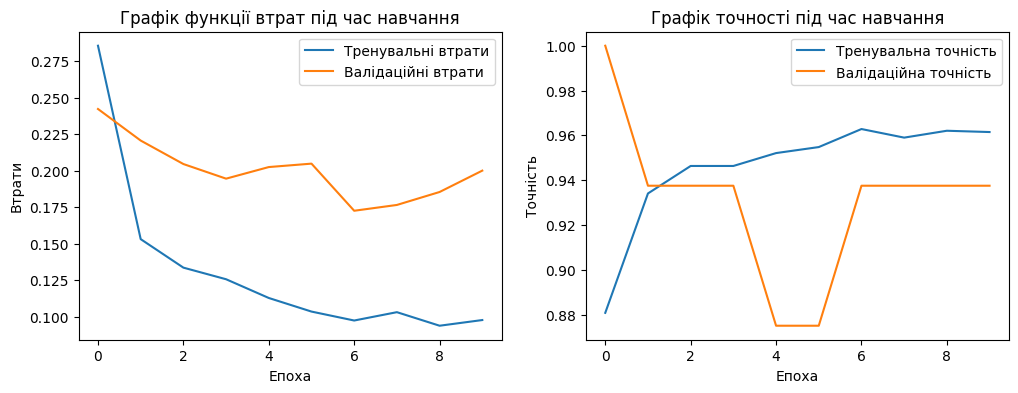


-- Навчання та оцінка завершені. --
Результати метрик можна використати для Розділу 3 Звіту.


In [ ]:
# -*- coding: utf-8 -*-
#
# Скрипт для реалізації та навчання Згорткової Нейронної Мережі (CNN)
# для бінарної класифікації пневмонії на рентгенівських знімках грудної клітки.
#
# Використовується метод Transfer Learning на базі MobileNetV2.
#
# Крок 1: Встановлення необхідних бібліотек
# pip install tensorflow numpy scikit-learn matplotlib kagglehub
#

import os
# import shutil # Видалено, оскільки ручна робота з файлами більше не потрібна
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import kagglehub # Додано для автоматичного завантаження датасету

# Гіперпараметри моделі та навчання
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10  # Для тестування використовуємо менше епох. Для фінальної роботи рекомендується 20-30.
LEARNING_RATE = 0.0001
CLASSES = ['NORMAL', 'PNEUMONIA']
NUM_CLASSES = len(CLASSES)
BASE_DIR = 'chest_xray_data' # Основна папка, де мають знаходитися дані

# --- 1.4 Етап 1: Підготовка даних та Аугментація ---

def setup_data_generators(base_dir=BASE_DIR):
    """
    Налаштування генераторів даних для завантаження, аугментації та нормалізації.
    """
    print("\nНалаштування генераторів даних...")

    # 1.4.1 Нормалізація: Ділимо на 255.0
    # 1.4.3 Аугментація для тренувального набору
    train_datagen = ImageDataGenerator(
        rescale=1./255, # Нормалізація
        rotation_range=10, # Незначні повороти
        zoom_range=0.1, # Зміна масштабу
        width_shift_range=0.1, # Зсуви по ширині
        height_shift_range=0.1, # Зсуви по висоті
        horizontal_flip=True, # Горизонтальне відображення
        fill_mode='nearest'
    )

    # Для валідаційного та тестового наборів - лише нормалізація, без аугментації
    test_val_datagen = ImageDataGenerator(rescale=1./255)

    # Генератор для тренувальних даних
    train_generator = train_datagen.flow_from_directory(
        os.path.join(base_dir, 'train'),
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary', # Бінарна класифікація
        shuffle=True
    )

    # Генератор для валідаційних даних
    validation_generator = test_val_datagen.flow_from_directory(
        os.path.join(base_dir, 'val'),
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )

    # Генератор для тестових даних
    test_generator = test_val_datagen.flow_from_directory(
        os.path.join(base_dir, 'test'),
        target_size=IMAGE_SIZE,
        batch_size=1, # Розмір батчу 1 для точного тестування
        class_mode='binary',
        shuffle=False # Важливо для коректної оцінки
    )

    return train_generator, validation_generator, test_generator

# --- 2.1 - 2.3 Реалізація та Навчання Моделі ---

def build_model(input_shape, num_classes, class_weights):
    """
    2.1 Обґрунтування вибору архітектури: Transfer Learning на MobileNetV2.
    """
    print("\nСтворення моделі MobileNetV2 з Transfer Learning...")
    #[Image of MobileNetV2 architecture]

    # Завантажуємо MobileNetV2, попередньо навчену на ImageNet, без верхніх шарів
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False, # Виключаємо фінальний класифікаційний шар
        input_shape=input_shape
    )

    # Заморожуємо базові шари, щоб зберегти вивчені ознаки
    base_model.trainable = False

    # Додаємо власні шари для бінарної класифікації пневмонії
    x = base_model.output
    x = GlobalAveragePooling2D()(x) # Згортання просторових ознак
    x = Dense(128, activation='relu')(x)
    # 2.4 Вихідний шар з Sigmoid для бінарної класифікації
    predictions = Dense(num_classes if num_classes > 2 else 1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # 2.3 Налаштування гіперпараметрів: Оптимізатор Adam та функція втрат
    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        # Використовуємо Binary Crossentropy для бінарної класифікації
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Виводимо структуру моделі (для Розділу 2.1)
    # model.summary()

    return model

def train_model(model, train_gen, val_gen, class_weights):
    """
    Проведення навчання моделі.
    """
    print(f"\nЗапуск навчання моделі на {EPOCHS} епох...")

    # Визначення callback-функцій
    # Early Stopping для запобігання перенавчанню
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3, # Кількість епох без покращення, після яких навчання зупиниться
        restore_best_weights=True
    )

    history = model.fit(
        train_gen,
        steps_per_epoch=train_gen.samples // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_gen,
        validation_steps=val_gen.samples // BATCH_SIZE,
        # 1.4.2 Вирішення проблеми дисбалансу класів
        class_weight=class_weights,
        callbacks=[early_stopping]
    )
    return history

# --- 3.1 - 3.3 Оцінка та Візуалізація Результатів ---

def evaluate_model(model, test_gen):
    """
    3.2 Оцінка ефективності моделі на тестовому наборі.
    """
    print("\nОцінка моделі на тестовому наборі...")
    test_gen.reset() # Скидаємо генератор для коректного проходу

    # Отримання прогнозів
    predictions = model.predict(test_gen, steps=test_gen.samples)
    y_pred = (predictions > 0.5).astype(int).flatten() # Бінаризація прогнозів
    y_true = test_gen.classes # Істинні мітки

    # 3.2.1 Матриця плутанини
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("\nМатриця Плутанини (Confusion Matrix):")
    print(conf_matrix)

    # 3.2.2 Таблиця ключових метрик
    print("\nЗвіт класифікації (Classification Report):")
    report = classification_report(y_true, y_pred, target_names=CLASSES, output_dict=True)
    print(classification_report(y_true, y_pred, target_names=CLASSES))

    # Додаткова метрика: AUC (Площа під ROC-кривою)
    roc_auc = roc_auc_score(y_true, predictions.flatten())
    print(f"Площа під ROC-кривою (AUC): {roc_auc:.4f}")

    return report, conf_matrix, roc_auc

def plot_history(history):
    """
    3.1 Аналіз динаміки навчання (Візуалізація 1: графіки втрат та точності).
    """
    print("\nПобудова графіків навчання...")

    plt.figure(figsize=(12, 4))

    # Графік втрат (Loss)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Тренувальні втрати')
    plt.plot(history.history['val_loss'], label='Валідаційні втрати')
    plt.title('Графік функції втрат під час навчання')
    plt.xlabel('Епоха')
    plt.ylabel('Втрати')
    plt.legend()

    # Графік точності (Accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Тренувальна точність')
    plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
    plt.title('Графік точності під час навчання')
    plt.xlabel('Епоха')
    plt.ylabel('Точність')
    plt.legend()

    plt.show()


# --- Основна функція ---

def main():
    global BASE_DIR # Оголошення для можливості зміни шляху завантаження

    # 1.3.3 Імітація обчислення ваг класів для вирішення дисбалансу
    # Справжні значення: Normal ~1583, Pneumonia ~4273
    total_samples = 5856
    weight_normal = total_samples / (2 * 1583) # Вага для класу 0 (Normal)
    weight_pneumonia = total_samples / (2 * 4273) # Вага для класу 1 (Pneumonia)

    # Словник ваг класів для Keras: {class_index: weight}
    class_weights = {0: weight_normal, 1: weight_pneumonia}
    print(f"Розраховані ваги класів: {class_weights}")

    # --- Крок 1: Автоматичне завантаження та підготовка даних з KaggleHub (оновлений метод) ---

    print("\nЗавантаження та розпакування датасету 'chest-xray-pneumonia' через KaggleHub...")
    try:
        # Завантаження останньої версії датасету.
        # Функція повертає локальний шлях, де розпаковано файли.
        download_path_obj = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
        download_path = str(download_path_obj)

        # Перевірка структури. KaggleHub зазвичай розпаковує у підпапку 'chest_xray'.
        new_base_dir_candidate = os.path.join(download_path, 'chest_xray')

        if os.path.isdir(new_base_dir_candidate):
            # Якщо знайдено папку 'chest_xray' (як очікується)
            BASE_DIR = new_base_dir_candidate
        else:
            # Інакше використовуємо сам кореневий шлях завантаження
            BASE_DIR = download_path

        print(f"Дані успішно завантажено. Робоча папка: {BASE_DIR}")

    except Exception as e:
        print(f"Помилка при завантаженні датасету через KaggleHub. Переконайтеся, що бібліотека встановлена (pip install kagglehub).")
        print(f"Детальна помилка: {e}")
        return

    # --- Крок 2: Налаштування та запуск моделі ---

    try:
        train_gen, val_gen, test_gen = setup_data_generators(BASE_DIR)
    except Exception as e:
        print(f"Помилка при завантаженні даних. Переконайтеся, що папки train/val/test та зображення існують у {BASE_DIR}.")
        print(f"Детальна помилка: {e}")
        return

    # 1.2.2.A та 2.1 - Створення моделі
    model = build_model(
        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), # 3 канали, бо MobileNet очікує кольорове зображення
        num_classes=NUM_CLASSES,
        class_weights=class_weights
    )

    # Навчання моделі
    history = train_model(model, train_gen, val_gen, class_weights)

    # Оцінка моделі
    report, conf_matrix, roc_auc = evaluate_model(model, test_gen)

    # Візуалізація історії навчання
    plot_history(history)

    print("\n-- Навчання та оцінка завершені. --")
    print("Результати метрик можна використати для Розділу 3 Звіту.")

if __name__ == '__main__':
    # Налаштування для уникнення попереджень TensorFlow
    tf.get_logger().setLevel('ERROR')
    main()

Розраховані ваги класів: {0: 1.8496525584333543, 1: 0.6852328574771823}

Завантаження та розпакування датасету 'chest-xray-pneumonia' через KaggleHub...
Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Дані успішно завантажено. Робоча папка: /kaggle/input/chest-xray-pneumonia/chest_xray

Налаштування генераторів даних...
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.

Створення моделі MobileNetV2 з Transfer Learning...

Запуск навчання моделі на 10 епох...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.8624 - loss: 0.3601 - val_accuracy: 0.8125 - val_loss: 0.3528
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.9357 - loss: 0.1589 - val_accuracy: 0.8750 - val_loss: 0.3201
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.9430 - loss: 0.1342 - val_accuracy: 0.7500 - val_loss: 0.3295
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9564 - loss: 0.1129 - val_accuracy: 0.8750 - val_loss: 0.2729
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9520 - loss: 0.1169 - val_accuracy: 0.8750 - val_loss: 0.2589
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.9579 - loss: 0.1056 - val_accuracy: 0.9375 - val_loss: 0.2677
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.9606 - loss: 0.1038 - val_accuracy: 0.7500 - val_loss: 0.2970
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9630 - loss: 0.0949 - val_accu


Навчена модель успішно збережена у файл: pneumonia_cnn_model.h5

Оцінка моделі на тестовому наборі...
624/624 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step

Матриця Плутанини (Confusion Matrix):
[[194  40]
 [ 22 368]]


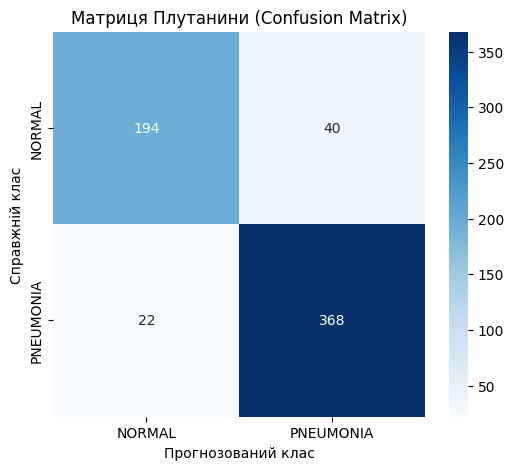


Звіт класифікації (Classification Report):
              precision    recall  f1-score   support

      NORMAL       0.90      0.83      0.86       234
   PNEUMONIA       0.90      0.94      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.89      0.89       624
weighted avg       0.90      0.90      0.90       624

Площа під ROC-кривою (AUC): 0.9654

Побудова графіків навчання...


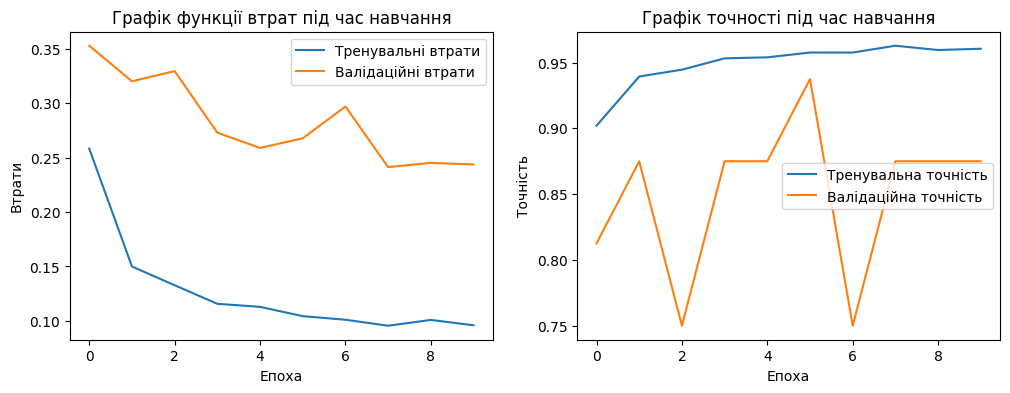


Практична демонстрація прогнозів на 9 випадкових знімках...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


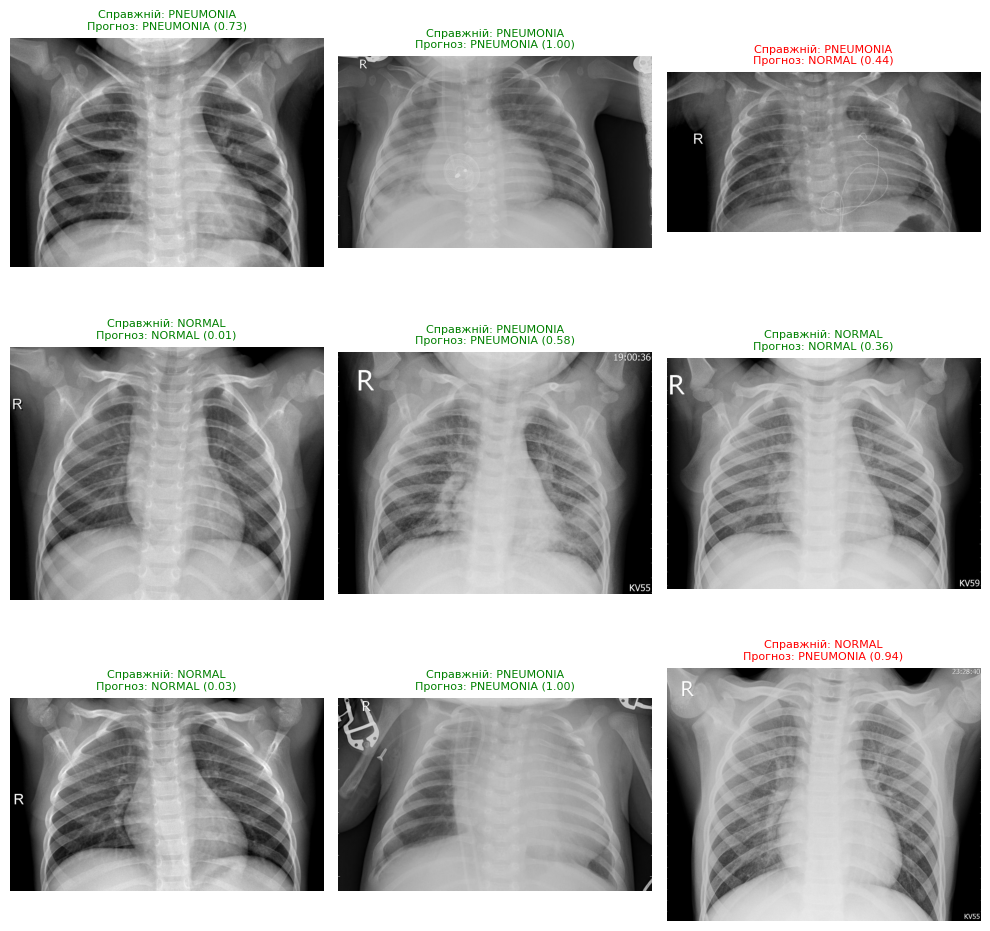


-- Навчання, оцінка та демонстрація завершені. --
Результати збережені та візуалізовані для використання у Розділі 3 Звіту.


In [ ]:
# -*- coding: utf-8 -*-
#
# Скрипт для реалізації та навчання Згорткової Нейронної Мережі (CNN)
# для бінарної класифікації пневмонії на рентгенівських знімках грудної клітки.
#
# Використовується метод Transfer Learning на базі MobileNetV2.
#
# Крок 1: Встановлення необхідних бібліотек
# pip install tensorflow numpy scikit-learn matplotlib kagglehub opencv-python seaborn
#

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns # Додано для візуалізації матриці плутанини
import kagglehub
import random
import cv2 # Для читання та обробки зображень

# Гіперпараметри моделі та навчання
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10  # Для тестування використовуємо менше епох. Для фінальної роботи рекомендується 20-30.
LEARNING_RATE = 0.0001
CLASSES = ['NORMAL', 'PNEUMONIA']
NUM_CLASSES = len(CLASSES)
BASE_DIR = 'chest_xray_data' # Основна папка, де мають знаходитися дані
MODEL_SAVE_PATH = 'pneumonia_cnn_model.h5' # Шлях для збереження навченої моделі

# --- 1.4 Етап 1: Підготовка даних та Аугментація ---

def setup_data_generators(base_dir=BASE_DIR):
    """
    Налаштування генераторів даних для завантаження, аугментації та нормалізації.
    """
    print("\nНалаштування генераторів даних...")

    # 1.4.1 Нормалізація: Ділимо на 255.0
    # 1.4.3 Аугментація для тренувального набору
    train_datagen = ImageDataGenerator(
        rescale=1./255, # Нормалізація
        rotation_range=10, # Незначні повороти
        zoom_range=0.1, # Зміна масштабу
        width_shift_range=0.1, # Зсуви по ширині
        height_shift_range=0.1, # Зсуви по висоті
        horizontal_flip=True, # Горизонтальне відображення
        fill_mode='nearest'
    )

    # Для валідаційного та тестового наборів - лише нормалізація, без аугментації
    test_val_datagen = ImageDataGenerator(rescale=1./255)

    # Генератор для тренувальних даних
    train_generator = train_datagen.flow_from_directory(
        os.path.join(base_dir, 'train'),
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary', # Бінарна класифікація
        shuffle=True
    )

    # Генератор для валідаційних даних
    validation_generator = test_val_datagen.flow_from_directory(
        os.path.join(base_dir, 'val'),
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )

    # Генератор для тестових даних
    test_generator = test_val_datagen.flow_from_directory(
        os.path.join(base_dir, 'test'),
        target_size=IMAGE_SIZE,
        batch_size=1, # Розмір батчу 1 для точного тестування
        class_mode='binary',
        shuffle=False # Важливо для коректної оцінки
    )

    return train_generator, validation_generator, test_generator

# --- 2.1 - 2.3 Реалізація та Навчання Моделі ---

def build_model(input_shape, num_classes, class_weights):
    """
    2.1 Обґрунтування вибору архітектури: Transfer Learning на MobileNetV2.
    """
    print("\nСтворення моделі MobileNetV2 з Transfer Learning...")

    # Завантажуємо MobileNetV2, попередньо навчену на ImageNet, без верхніх шарів
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False, # Виключаємо фінальний класифікаційний шар
        input_shape=input_shape
    )

    # Заморожуємо базові шари, щоб зберегти вивчені ознаки
    base_model.trainable = False

    # Додаємо власні шари для бінарної класифікації пневмонії
    x = base_model.output
    x = GlobalAveragePooling2D()(x) # Згортання просторових ознак
    x = Dense(128, activation='relu')(x)
    # 2.4 Вихідний шар з Sigmoid для бінарної класифікації
    predictions = Dense(num_classes if num_classes > 2 else 1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # 2.3 Налаштування гіперпараметрів: Оптимізатор Adam та функція втрат
    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        # Використовуємо Binary Crossentropy для бінарної класифікації
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

def train_model(model, train_gen, val_gen, class_weights):
    """
    Проведення навчання моделі та збереження.
    """
    print(f"\nЗапуск навчання моделі на {EPOCHS} епох...")

    # Визначення callback-функцій
    # Early Stopping для запобігання перенавчанню
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3, # Кількість епох без покращення, після яких навчання зупиниться
        restore_best_weights=True
    )

    history = model.fit(
        train_gen,
        steps_per_epoch=train_gen.samples // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_gen,
        validation_steps=val_gen.samples // BATCH_SIZE,
        # 1.4.2 Вирішення проблеми дисбалансу класів
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    # Збереження навченої моделі (обов'язково для Розділу 2.4)
    model.save(MODEL_SAVE_PATH)
    print(f"\nНавчена модель успішно збережена у файл: {MODEL_SAVE_PATH}")

    return history

# --- 3.1 - 3.3 Оцінка та Візуалізація Результатів ---

def plot_confusion_matrix(conf_matrix, classes):
    """
    Візуалізація матриці плутанини (для Розділу 3.2).
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=classes,
        yticklabels=classes
    )
    plt.title('Матриця Плутанини (Confusion Matrix)')
    plt.ylabel('Справжній клас')
    plt.xlabel('Прогнозований клас')
    plt.show()


def evaluate_model(model, test_gen):
    """
    3.2 Оцінка ефективності моделі на тестовому наборі.
    """
    print("\nОцінка моделі на тестовому наборі...")
    test_gen.reset() # Скидаємо генератор для коректного проходу

    # Отримання прогнозів
    predictions = model.predict(test_gen, steps=test_gen.samples)
    y_pred = (predictions > 0.5).astype(int).flatten() # Бінаризація прогнозів
    y_true = test_gen.classes # Істинні мітки

    # 3.2.1 Матриця плутанини (цифри)
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("\nМатриця Плутанини (Confusion Matrix):")
    print(conf_matrix)

    # 3.2.1 Матриця плутанини (візуалізація)
    plot_confusion_matrix(conf_matrix, CLASSES)

    # 3.2.2 Таблиця ключових метрик
    print("\nЗвіт класифікації (Classification Report):")
    report = classification_report(y_true, y_pred, target_names=CLASSES, output_dict=True)
    print(classification_report(y_true, y_pred, target_names=CLASSES))

    # Додаткова метрика: AUC (Площа під ROC-кривою)
    roc_auc = roc_auc_score(y_true, predictions.flatten())
    print(f"Площа під ROC-кривою (AUC): {roc_auc:.4f}")

    return report, conf_matrix, roc_auc

def plot_history(history):
    """
    3.1 Аналіз динаміки навчання (Візуалізація 1: графіки втрат та точності).
    """
    print("\nПобудова графіків навчання...")

    plt.figure(figsize=(12, 4))

    # Графік втрат (Loss)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Тренувальні втрати')
    plt.plot(history.history['val_loss'], label='Валідаційні втрати')
    plt.title('Графік функції втрат під час навчання')
    plt.xlabel('Епоха')
    plt.ylabel('Втрати')
    plt.legend()

    # Графік точності (Accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Тренувальна точність')
    plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
    plt.title('Графік точності під час навчання')
    plt.xlabel('Епоха')
    plt.ylabel('Точність')
    plt.legend()

    plt.show()

def visualize_predictions(model, base_dir, num_images=9):
    """
    3.3 Практична демонстрація роботи моделі на 9 випадкових тестових знімках.
    """
    print(f"\nПрактична демонстрація прогнозів на {num_images} випадкових знімках...")

    test_dir = os.path.join(base_dir, 'test')

    # Збір шляхів до всіх тестових зображень
    all_test_paths = []
    for root, _, files in os.walk(test_dir):
        for file in files:
            if file.endswith(('jpeg', 'png', 'jpg')):
                all_test_paths.append(os.path.join(root, file))

    if not all_test_paths:
        print("Помилка: Не знайдено тестових зображень для демонстрації.")
        return

    # Випадковий вибір num_images знімків
    selected_paths = random.sample(all_test_paths, min(num_images, len(all_test_paths)))

    plt.figure(figsize=(10, 10))

    for i, img_path in enumerate(selected_paths):
        # 1. Завантаження та попередня обробка зображення
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img_array = img_to_array(img) / 255.0 # Нормалізація
        img_input = np.expand_dims(img_array, axis=0) # Додаємо розмір батчу

        # 2. Прогноз моделі
        prediction = model.predict(img_input)
        prob_pneumonia = prediction[0][0]
        predicted_class_idx = 1 if prob_pneumonia > 0.5 else 0
        predicted_label = CLASSES[predicted_class_idx]

        # 3. Визначення справжнього класу (для підпису)
        # Шлях містить назву папки-класу
        true_label = 'PNEUMONIA' if 'PNEUMONIA' in img_path else 'NORMAL'

        # 4. Формування підпису
        color = 'green' if predicted_label == true_label else 'red'
        title = f"Справжній: {true_label}\nПрогноз: {predicted_label} ({prob_pneumonia:.2f})"

        # 5. Візуалізація
        plt.subplot(3, 3, i + 1)
        # Використовуємо OpenCV для коректного відображення зображень у відтінках сірого
        cv_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(cv_img, cmap='gray')
        plt.title(title, color=color, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# --- Основна функція ---

def main():
    global BASE_DIR # Оголошення для можливості зміни шляху завантаження

    # 1.3.3 Імітація обчислення ваг класів для вирішення дисбалансу
    # Справжні значення: Normal ~1583, Pneumonia ~4273
    total_samples = 5856
    weight_normal = total_samples / (2 * 1583) # Вага для класу 0 (Normal)
    weight_pneumonia = total_samples / (2 * 4273) # Вага для класу 1 (Pneumonia)

    # Словник ваг класів для Keras: {class_index: weight}
    class_weights = {0: weight_normal, 1: weight_pneumonia}
    print(f"Розраховані ваги класів: {class_weights}")

    # --- Крок 1: Автоматичне завантаження та підготовка даних з KaggleHub ---

    print("\nЗавантаження та розпакування датасету 'chest-xray-pneumonia' через KaggleHub...")
    try:
        download_path_obj = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
        download_path = str(download_path_obj)

        new_base_dir_candidate = os.path.join(download_path, 'chest_xray')

        if os.path.isdir(new_base_dir_candidate):
            BASE_DIR = new_base_dir_candidate
        else:
            BASE_DIR = download_path

        print(f"Дані успішно завантажено. Робоча папка: {BASE_DIR}")

    except Exception as e:
        print(f"Помилка при завантаженні датасету через KaggleHub. Переконайтеся, що бібліотека встановлена (pip install kagglehub).")
        print(f"Детальна помилка: {e}")
        return

    # --- Крок 2: Налаштування та запуск моделі ---

    try:
        train_gen, val_gen, test_gen = setup_data_generators(BASE_DIR)
    except Exception as e:
        print(f"Помилка при завантаженні даних. Переконайтеся, що папки train/val/test та зображення існують у {BASE_DIR}.")
        print(f"Детальна помилка: {e}")
        return

    # 1.2.2.A та 2.1 - Створення моделі
    model = build_model(
        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
        num_classes=NUM_CLASSES,
        class_weights=class_weights
    )

    # Навчання моделі
    history = train_model(model, train_gen, val_gen, class_weights)

    # Оцінка моделі
    report, conf_matrix, roc_auc = evaluate_model(model, test_gen)

    # Візуалізація історії навчання
    plot_history(history)

    # Практична демонстрація прогнозів (для Розділу 3.3)
    visualize_predictions(model, BASE_DIR, num_images=9)

    print("\n-- Навчання, оцінка та демонстрація завершені. --")
    print("Результати збережені та візуалізовані для використання у Розділі 3 Звіту.")

if __name__ == '__main__':
    tf.get_logger().setLevel('ERROR')
    main()